In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('air.csv')

In [3]:
df1 = df.drop(['Time', 'Flight #', 'Route', 'Registration', 'cn/In', 'Summary'],1)
df1['Year']=pd.to_datetime(df['Date']).dt.year
df1['Month']=pd.to_datetime(df['Date']).dt.month
df1['Accidents'] = 1.0
df1['MP'] = df1['Operator'].map(lambda x: 'Military' if 'Military' in str(x) else 'Passanger')
df1['Country'] = df1['Location'].map(lambda x: str(x).split(',')[-1].strip())
df1.head()

,Date,Location,Operator,Type,Aboard,Fatalities,Ground,Year,Month,Accidents,MP,Country
0,09/17/1908,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,2.0,1.0,0.0,1908,9,1.0,Military,Virginia
1,07/12/1912,"AtlantiCity, New Jersey",Military - U.S. Navy,Dirigible,5.0,5.0,0.0,1912,7,1.0,Military,New Jersey
2,08/06/1913,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,1.0,1.0,0.0,1913,8,1.0,Passanger,Canada
3,09/09/1913,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),20.0,14.0,0.0,1913,9,1.0,Military,Over the North Sea
4,10/17/1913,"Near Johannisthal, Germany",Military - German Navy,Zeppelin L-2 (airship),30.0,30.0,0.0,1913,10,1.0,Military,Germany


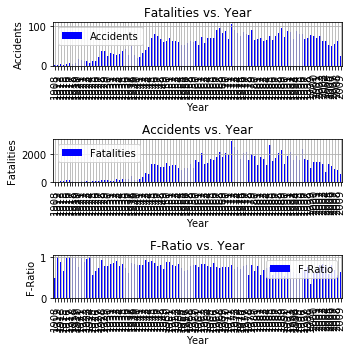

In [4]:
year_sum = df1.groupby(['Year'], as_index=False).sum()
year_sum['F-Ratio'] = year_sum['Fatalities'] / year_sum['Aboard']

fig,ax = plt.subplots(3, 1, figsize=(5,5))
year_sum.plot(x='Year', y='Accidents', kind='bar',grid=True,ax=ax[0],rot=90, color='b')
year_sum.plot(x='Year', y='Fatalities', kind='bar',grid=True,ax=ax[1],rot=90, color='b')
year_sum.plot(x='Year', y='F-Ratio', kind='bar', grid=True,ax=ax[2], rot=90, color='b')

ax[0].set(ylabel="Accidents", xlabel="Year", title="Fatalities vs. Year")
ax[1].set(ylabel='Fatalities', xlabel="Year", title="Accidents vs. Year")
ax[2].set(ylabel="F-Ratio", xlabel="Year", title="F-Ratio vs. Year")


plt.tight_layout() 

In [5]:
MP_sum = df1.groupby(['Year','MP'], as_index=False).sum()
MP_sum['F-Ratio'] = MP_sum['Fatalities'] / MP_sum['Aboard']
M = MP_sum[MP_sum['MP']=='Military']
P = MP_sum[MP_sum['MP']=='Passanger']

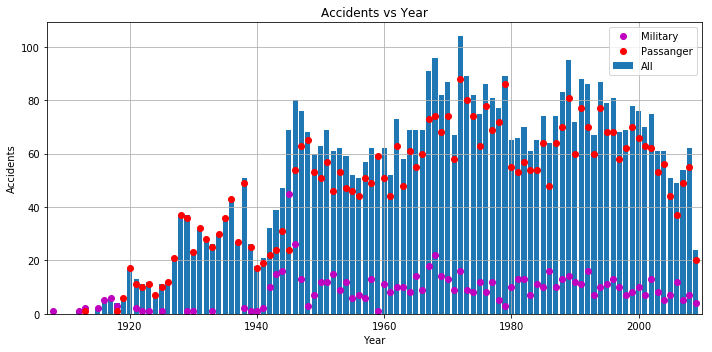

In [15]:
plt.figure(figsize=(10,5))

plt.bar(year_sum['Year'], year_sum['Accidents'], label='All')
plt.plot(M['Year'], M['Accidents'], 'mo', label='Military', linewidth=2)
plt.plot(P['Year'], P['Accidents'], 'ro', label='Passanger', linewidth=2)

plt.xlabel("Year")  
plt.ylabel("Accidents")  
plt.title("Accidents vs Year") 

plt.xlim(1907,2010) 
plt.grid()
plt.legend()  
plt.tight_layout() 

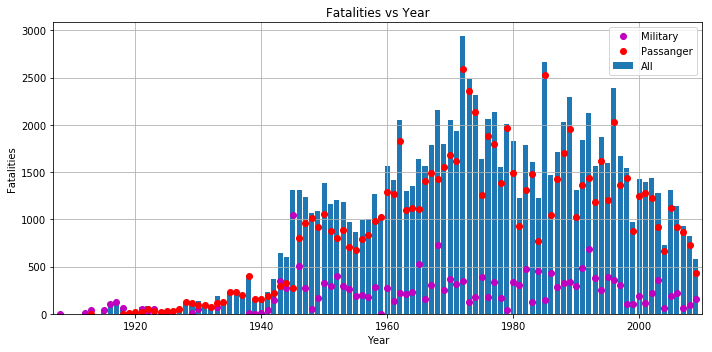

In [6]:
plt.figure(figsize=(10,5))

plt.bar(year_sum['Year'], year_sum['Fatalities'], label='All')
plt.plot(M['Year'], M['Fatalities'], 'mo', label='Military', linewidth=2)
plt.plot(P['Year'], P['Fatalities'], 'ro', label='Passanger', linewidth=2)

plt.xlabel("Year")  
plt.ylabel("Fatalities")  
plt.title("Fatalities vs Year") 

plt.xlim(1907,2010) 
plt.grid()
plt.legend()  
plt.tight_layout() 

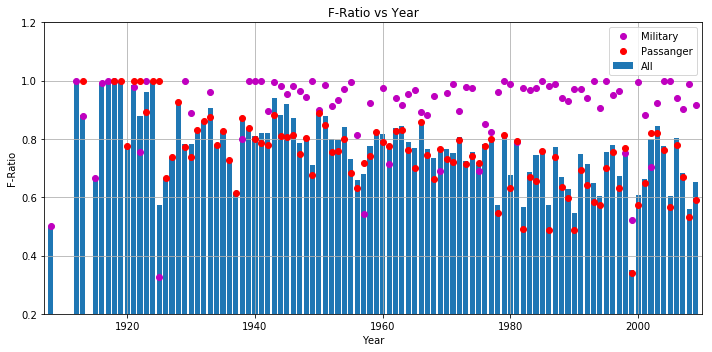

In [18]:
plt.figure(figsize=(10,5))

plt.bar(year_sum['Year'], year_sum['F-Ratio'], label='All')
plt.plot(M['Year'], M['F-Ratio'], 'mo', label='Military', linewidth=2)
plt.plot(P['Year'], P['F-Ratio'], 'ro', label='Passanger', linewidth=2)

plt.xlabel("Year")  
plt.ylabel("F-Ratio")  
plt.title("F-Ratio vs Year") 

plt.xlim(1907,2010) 
plt.ylim(0.2,1.2) 
plt.grid()
plt.legend()  
plt.tight_layout() 

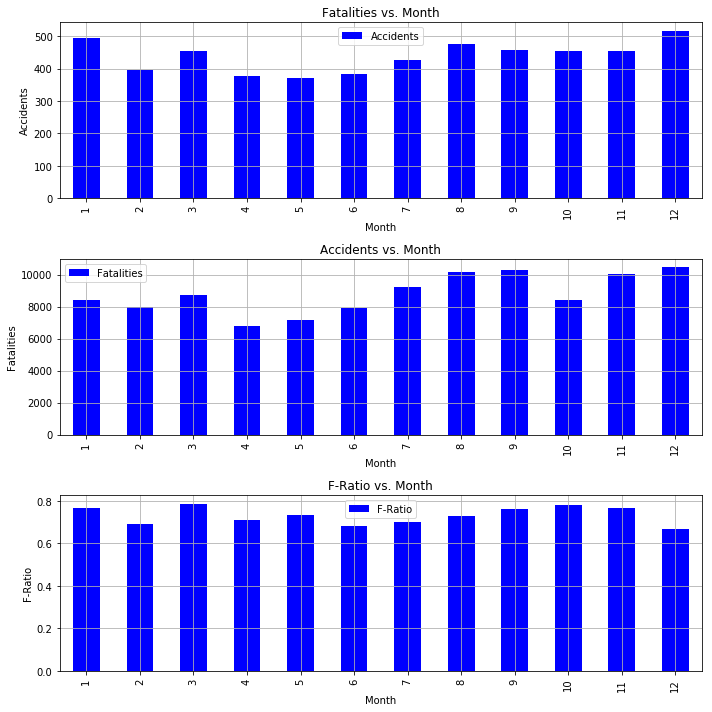

In [17]:
month_sum = df1.groupby(['Month'], as_index=False).sum()
month_sum['F-Ratio'] = month_sum['Fatalities'] / month_sum['Aboard']

fig,ax = plt.subplots(3, 1, figsize=(10,10))
month_sum.plot(x='Month', y='Accidents', kind='bar',grid=True, ax=ax[0], color='b')
month_sum.plot(x='Month', y='Fatalities', kind='bar',grid=True, ax=ax[1], color='b')
month_sum.plot(x='Month', y='F-Ratio', kind='bar', grid=True, ax=ax[2], color='b')

ax[0].set(ylabel="Accidents", xlabel='Month', title='Fatalities vs. Month')
ax[1].set(ylabel='Fatalities', xlabel='Month', title='Accidents vs. Month')
ax[2].set(ylabel="F-Ratio", xlabel='Month', title='F-Ratio vs. Month')

plt.tight_layout()

In [24]:
def top(name, data, on, n=10):
    name_sum = data.groupby(name, as_index=False).sum()
    top_ac = name_sum.sort_values('Accidents',ascending=False).iloc[:n, :]
    top_fa = name_sum.sort_values('Fatalities',ascending=False).iloc[:n, :]
    if on == 1:
        f, ax = plt.subplots(1,2, figsize=(10, 5))
        sns.barplot(x='Accidents', y=name, data=top_ac, palette="Blues_r", ax=ax[0])
        sns.barplot(x='Fatalities', y=name, data=top_fa, palette="Blues_r", ax=ax[1])
        sns.despine(left=True, bottom=True)
        plt.tight_layout()
    return [top_ac, top_fa]

def top_ob(name, data, ob, n=5):
    name_sum = data.groupby(name, as_index=False).sum()
    top_ac = name_sum.sort_values(ob,ascending=False).iloc[:n, :]
    color = ['k', 'r', 'b', 'm', 'g']
    j=0
    plt.figure(figsize=(10,4))
    cy = data.groupby(['Year', name], as_index=False).sum()
    
    for i in top_ac[name].tolist():
        cy1 = cy[cy[name]==i]
        plt.plot(cy1['Year'], cy1[ob], color[j]+'D--', label=i, linewidth=1)
        j = j+1
        
    plt.xlabel("Year")  
    plt.ylabel(ob)  
        
    plt.xlim(1907,2010)     
    plt.grid()
    plt.legend()  
    plt.tight_layout()

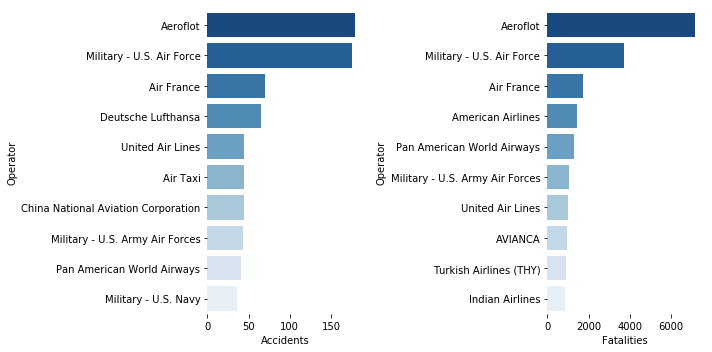

In [19]:
operator = top('Operator', df1, 1)

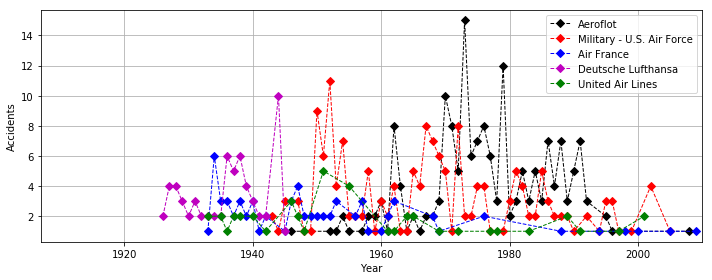

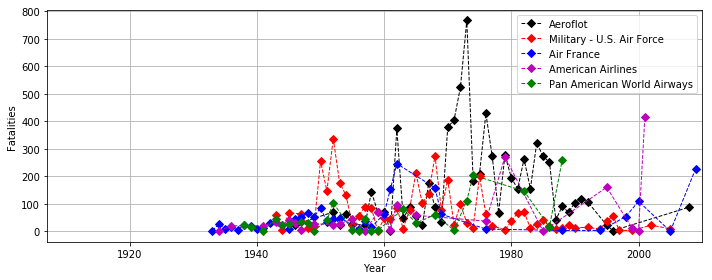

In [25]:
top_ob('Operator', df1, 'Accidents')
top_ob('Operator', df1, 'Fatalities')

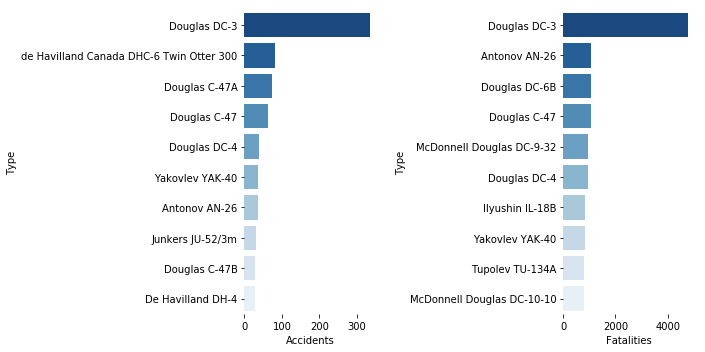

In [26]:
type_1 = top('Type', df1, 1)

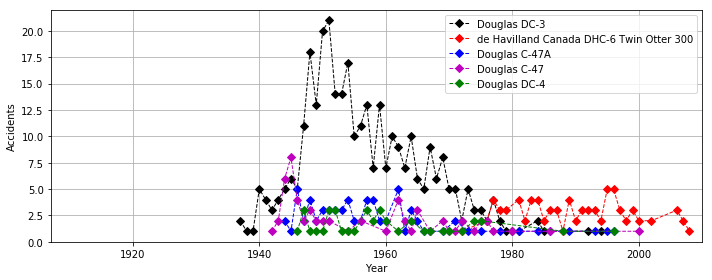

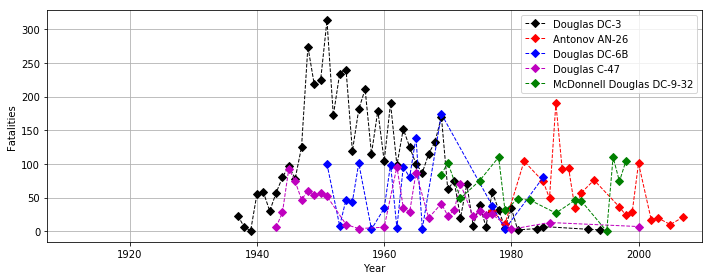

In [27]:
top_ob('Type', df1, 'Accidents')
top_ob('Type', df1, 'Fatalities')

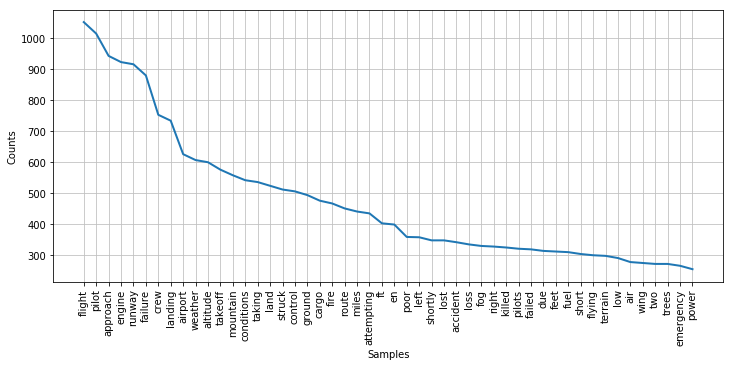

In [33]:
from nltk import FreqDist
from nltk.corpus import stopwords
import string

def remove_punctuation(s):
    exclude = set(string.punctuation)
    s = ''.join([i for i in s if i not in exclude])
    return s

stop = stopwords.words('english')
stop.append('plane')
stop.append('crashed')
stop.append('aircraft')

t = df['Summary'].dropna()
book = t.str.lower().apply(remove_punctuation).str.split().values.sum()
wrd = [w for w in book if w not in stop]

fdist = FreqDist(wrd)

plt.figure(figsize=(12,5))
fdist.plot(50)

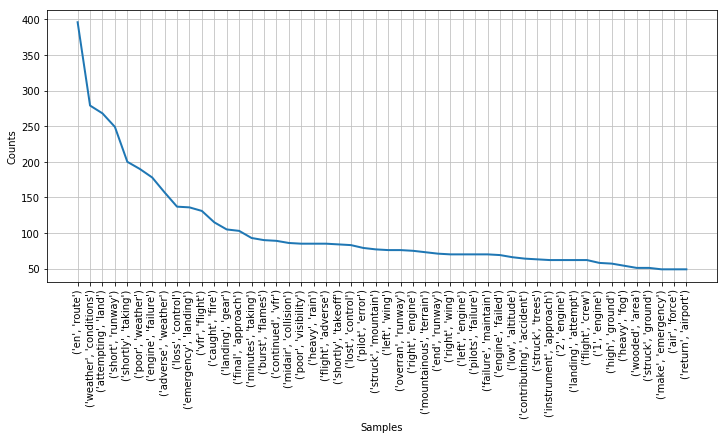

In [34]:
from nltk import bigrams

bigrams = list(bigrams(wrd))
fdistBigram = FreqDist(bigrams)

plt.figure(figsize=(12,5))

fdistBigram.plot(50)

In [30]:
usNames = ['Virginia','New Jersey','Ohio','Pennsylvania', 'Maryland', 'Indiana', 'Iowa',
          'Illinois','Wyoming', 'Minnisota', 'Wisconsin', 'Nevada', 'NY','California',
          'WY','New York','Oregon', 'Idaho', 'Connecticut','Nebraska', 'Minnesota', 'Kansas',
          'Texas', 'Tennessee', 'West Virginia', 'New Mexico', 'Washington', 'Massachusetts',
          'Utah', 'Ilinois','Florida', 'Michigan', 'Arkansas','Colorado', 'Georgia','Missouri',
          'Montana', 'Mississippi','Alaska','Jersey', 'Cailifornia', 'Oklahoma','North Carolina',
          'Kentucky','Delaware','D.C.','Arazona','Arizona','South Dekota','New Hampshire','Hawaii',
          'Washingon','Massachusett','Washington DC','Tennesee','Deleware','Louisiana',
          'Massachutes', 'Louisana', 'New York (Idlewild)','Oklohoma','North Dakota','Rhode Island',
          'Maine','Alakska','Wisconson','Calilfornia','Virginia','Virginia.','CA','Vermont',
          'HI','AK','IN','GA','Coloado','Airzona','Alabama','Alaksa' 
          ]

afNames = ['Afghanstan'] #Afghanistan
anNames = ['off Angola'] #Angola
ausNames = ['Qld. Australia','Queensland  Australia','Tasmania','off Australia'] #Australia
argNames = ['Aregntina'] #Argentina
azNames = ['Azores (Portugal)'] #Azores
baNames = ['Baangladesh'] #Bangladesh
bahNames = ['Great Inagua'] #Bahamas
berNames = ['off Bermuda'] #Bermuda
bolNames = ['Boliva','BO'] #Bolivia
bhNames = ['Bosnia-Herzegovina'] #Bosnia Herzegovina
bulNames = ['Bugaria','Bulgeria'] #Bulgaria
canNames = ['British Columbia', 'British Columbia Canada','Canada2',
            'Saskatchewan','Yukon Territory'] #Canada
camNames = ['Cameroons','French Cameroons'] #Cameroon
caNames = ['Cape Verde Islands'] #Cape Verde
chNames = ['Chili'] #Chile
coNames = ['Comoro Islands', 'Comoros Islands'] #Comoros
djNames = ['Djbouti','Republiof Djibouti'] #Djibouti
domNames = ['Domincan Republic', 'Dominica'] #Dominican Republic
drcNames = ['Belgian Congo','Belgian Congo (Zaire)','Belgium Congo'
           'DR Congo','DemocratiRepubliCogo','DemocratiRepubliCongo',
            'DemocratiRepubliof Congo','DemoctratiRepubliCongo','Zaire',
           'Zaïre'] #Democratic Republic of Congo
faNames = ['French Equitorial Africa'] #French Equatorial Africa
gerNames = ['East Germany','West Germany'] #Germany
grNames = ['Crete'] #Greece
haNames = ['Hati'] #Haiti
hunNames = ['Hunary'] #Hungary
inNames = ['Indian'] #India
indNames = ['Inodnesia','Netherlands Indies'] #Indonesia
jamNames = ['Jamacia'] #Jamaica
malNames = ['Malaya'] #Malaysia
manNames = ['Manmar'] #Myanmar
marNames = ['Mauretania'] #Mauritania
morNames = ['Morrocco','Morroco'] #Morocco
nedNames = ['Amsterdam','The Netherlands'] #Netherlands
niNames = ['Niger'] #Nigeria
philNames = ['Philipines','Philippine Sea', 'Phillipines',
            'off the Philippine island of Elalat'] #Philippines
romNames = ['Romainia'] #Romania
rusNames = ['Russian','Soviet Union','USSR'] #Russia
saNames = ['Saint Lucia Island'] #Saint Lucia
samNames = ['Western Samoa'] #Samoa
siNames = ['Sierre Leone'] #Sierra Leone
soNames = ['South Africa (Namibia)'] #South Africa
surNames = ['Suriname'] #Surinam
uaeNames = ['United Arab Emirates'] #UAE
ukNames = ['England', 'UK','Wales','110 miles West of Ireland'] #United Kingdom
uvNames = ['US Virgin Islands','Virgin Islands'] #U.S. Virgin Islands
wkNames = ['325 miles east of Wake Island']#Wake Island
yuNames = ['Yugosalvia'] #Yugoslavia
zimNames = ['Rhodesia', 'Rhodesia (Zimbabwe)'] #Zimbabwe

clnames = []
for country in df1['Country'].values:
    if country in afNames:
        clnames.append('Afghanistan')
    elif country in anNames:
        clnames.append('Angola')
    elif country in ausNames:
        clnames.append('Australia')
    elif country in argNames:
        clnames.append('Argentina')
    elif country in azNames:
        clnames.append('Azores')
    elif country in baNames:
        clnames.append('Bangladesh')
    elif country in bahNames:
        clnames.append('Bahamas')
    elif country in berNames:
        clnames.append('Bermuda')
    elif country in bolNames:
        clnames.append('Bolivia')
    elif country in bhNames:
        clnames.append('Bosnia Herzegovina')
    elif country in bulNames:
        clnames.append('Bulgaria')
    elif country in canNames:
        clnames.append('Canada')
    elif country in camNames:
        clnames.append('Cameroon')
    elif country in caNames:
        clnames.append('Cape Verde')
    elif country in chNames:
        clnames.append('Chile')
    elif country in coNames:
        clnames.append('Comoros')
    elif country in djNames:
        clnames.append('Djibouti')
    elif country in domNames:
        clnames.append('Dominican Republic')
    elif country in drcNames:
        clnames.append('Democratic Republic of Congo')
    elif country in faNames:
        clnames.append('French Equatorial Africa')
    elif country in gerNames:
        clnames.append('Germany')
    elif country in grNames:
        clnames.append('Greece')
    elif country in haNames:
        clnames.append('Haiti')
    elif country in hunNames:
        clnames.append('Hungary')
    elif country in inNames:
        clnames.append('India')
    elif country in jamNames:
        clnames.append('Jamaica')
    elif country in malNames:
        clnames.append('Malaysia')
    elif country in manNames:
        clnames.append('Myanmar')
    elif country in marNames:
        clnames.append('Mauritania')
    elif country in morNames:
        clnames.append('Morocco')
    elif country in nedNames:
        clnames.append('Netherlands')
    elif country in niNames:
        clnames.append('Nigeria')
    elif country in philNames:
        clnames.append('Philippines')
    elif country in romNames:
        clnames.append('Romania')
    elif country in rusNames:
        clnames.append('Russia')
    elif country in saNames:
        clnames.append('Saint Lucia')
    elif country in samNames:
        clnames.append('Samoa')
    elif country in siNames:
        clnames.append('Sierra Leone')
    elif country in soNames:
        clnames.append('South Africa')
    elif country in surNames:
        clnames.append('Surinam')
    elif country in uaeNames:
        clnames.append('UAE')
    elif country in ukNames:
        clnames.append('United Kingdom')
    elif country in usNames:
        clnames.append('United States of America')
    elif country in uvNames:
        clnames.append('U.S. Virgin Islands')
    elif country in wkNames:
        clnames.append('Wake Island')
    elif country in yuNames:
        clnames.append('Yugoslavia')
    elif country in zimNames:
        clnames.append('Zimbabwe')
    else:
        clnames.append(country)
        
df1['Cleaned Country'] = clnames 

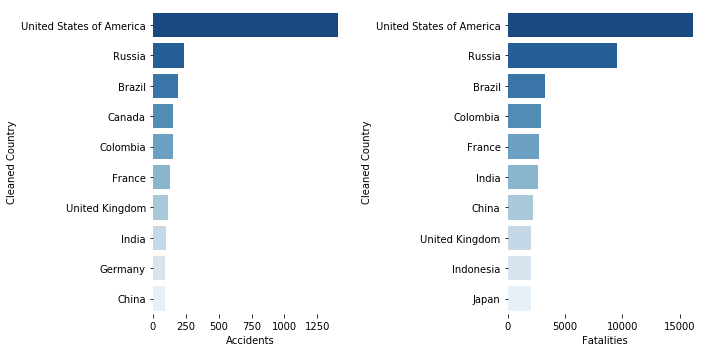

In [31]:
country = top('Cleaned Country', df1, 1)

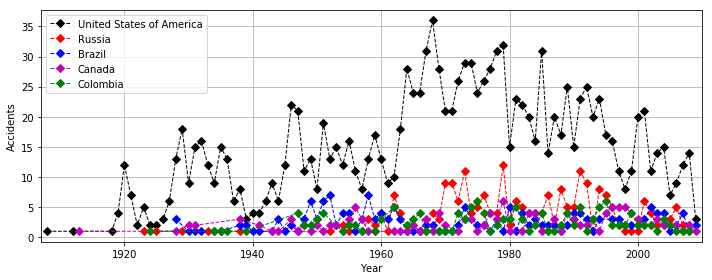

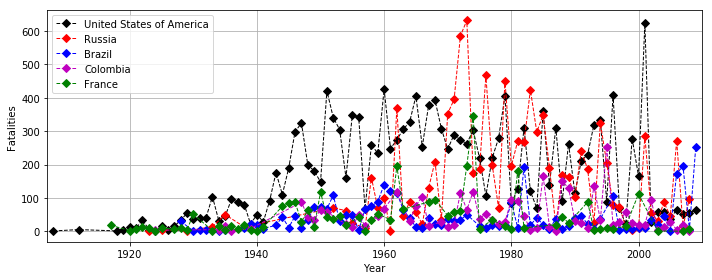

In [32]:
top_ob('Cleaned Country', df1, 'Accidents')
top_ob('Cleaned Country', df1, 'Fatalities')